In [165]:
import pandas as pd

In [166]:
df = pd.read_csv('2019_ca.csv')

In [167]:
print(df)

      year    county zipcode       rate      num1       num2       num3
0     2019  Alameda:   94610  21.527439  6.131795  63.405669  10.482914
1     2019  Alameda:   94621  20.812367  7.281984  54.473677   8.817164
2     2019  Alameda:   94608  16.525211  5.824393  54.587357   6.962202
3     2019  Alameda:   94606  14.899429  5.286077  36.639740   6.245729
4     2019  Alameda:   94605  14.599118  5.727314  32.643685   5.638403
...    ...       ...     ...        ...       ...        ...        ...
1794  2019     Yuba:   95919   0.000000  0.000000   0.000000   0.000000
1795  2019     Yuba:   95925   0.000000  0.000000   0.000000   0.000000
1796  2019     Yuba:   95935   0.000000  0.000000   0.000000   0.000000
1797  2019     Yuba:   95962   0.000000  0.000000   0.000000   0.000000
1798  2019     Yuba:   95972   0.000000       NaN        NaN        NaN

[1799 rows x 7 columns]


In [168]:
def filter_zipcode(row):
    if row["zipcode"].isdigit():
        return True
    else:
        return False
        

In [169]:
df.apply(filter_zipcode,axis=1)#axis=1 is row, axis=0 is column

0       True
1       True
2       True
3       True
4       True
        ... 
1794    True
1795    True
1796    True
1797    True
1798    True
Length: 1799, dtype: bool

In [170]:
df = df[df.apply(filter_zipcode,axis=1)]#filter
print(df)

      year    county zipcode       rate      num1       num2       num3
0     2019  Alameda:   94610  21.527439  6.131795  63.405669  10.482914
1     2019  Alameda:   94621  20.812367  7.281984  54.473677   8.817164
2     2019  Alameda:   94608  16.525211  5.824393  54.587357   6.962202
3     2019  Alameda:   94606  14.899429  5.286077  36.639740   6.245729
4     2019  Alameda:   94605  14.599118  5.727314  32.643685   5.638403
...    ...       ...     ...        ...       ...        ...        ...
1794  2019     Yuba:   95919   0.000000  0.000000   0.000000   0.000000
1795  2019     Yuba:   95925   0.000000  0.000000   0.000000   0.000000
1796  2019     Yuba:   95935   0.000000  0.000000   0.000000   0.000000
1797  2019     Yuba:   95962   0.000000  0.000000   0.000000   0.000000
1798  2019     Yuba:   95972   0.000000       NaN        NaN        NaN

[1689 rows x 7 columns]


In [171]:
df=df.drop("num1",axis=1)

In [172]:
df=df.drop("num2",axis=1)

In [173]:
df=df.drop("num3",axis=1)

In [174]:
ranges = {"0-10":0, "10-20":0,"20-30":0,"30+":0}
for index,row in df.iterrows():
    if row.rate <10:
        ranges["0-10"] = ranges["0-10"] + 1
    if row.rate < 20 and row.rate>10:
        ranges["10-20"] = ranges["20-30"] + 1
    if row.rate < 30 and row.rate>20:
        ranges["20-30"] = ranges["20-30"] + 1
    else:
        ranges["30+"] = ranges["30+"] + 1

In [175]:
print(ranges)

{'0-10': 1298, '10-20': 61, '20-30': 62, '30+': 1627}


<AxesSubplot:>

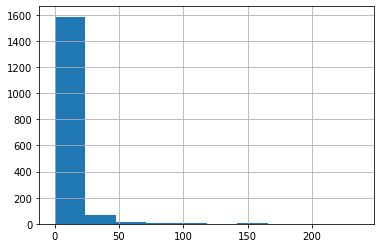

In [176]:
df["rate"].hist(bins=10)

In [177]:
df.describe()

,year,rate
count,1689.0,1689.000000
mean,2019.0,7.501563
std,0.0,15.595298
min,2019.0,0.000000
25%,2019.0,0.000000
50%,2019.0,3.507389
75%,2019.0,9.323450
max,2019.0,236.668796


In [178]:
from matplotlib import pyplot as plt

<AxesSubplot:>

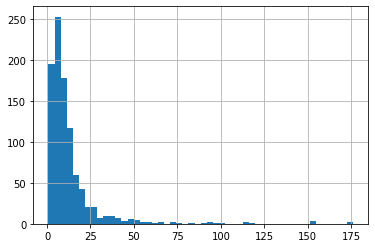

In [179]:
df[(df["rate"]<200) & (df['rate']>0) ]['rate'].hist(bins=50)

In [180]:
from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)

<Figure size 1600x480 with 0 Axes>

<Figure size 1600x480 with 0 Axes>

In [181]:
income = pd.read_excel("median_income.xlsx")

In [182]:
income

,Unnamed: 0,Unnamed: 1,Unnamed: 2,GEO_ID,NAME,S1903_C03_015E
0,NaN,NaN,NaN,id,Geographic Area Name,Estimate!!Median income (dollars)!!FAMILIES!!F...
1,NaN,NaN,NaN,8600000US00601,ZCTA5 00601,15721
2,NaN,NaN,NaN,8600000US00602,ZCTA5 00602,21060
3,NaN,NaN,NaN,8600000US00603,ZCTA5 00603,19340
4,NaN,NaN,NaN,8600000US00606,ZCTA5 00606,16176
...,...,...,...,...,...,...
33116,NaN,NaN,NaN,8600000US99923,ZCTA5 99923,-
33117,NaN,NaN,NaN,8600000US99925,ZCTA5 99925,80139
33118,NaN,NaN,NaN,8600000US99926,ZCTA5 99926,70147
33119,NaN,NaN,NaN,8600000US99927,ZCTA5 99927,-


In [183]:
def filter_income(row):
    if row["NAME"].startswith("G"):
        return False
    else:
        return True

In [184]:
income = income[income.apply(filter_income,axis=1)]

In [185]:
income

,Unnamed: 0,Unnamed: 1,Unnamed: 2,GEO_ID,NAME,S1903_C03_015E
1,NaN,NaN,NaN,8600000US00601,ZCTA5 00601,15721
2,NaN,NaN,NaN,8600000US00602,ZCTA5 00602,21060
3,NaN,NaN,NaN,8600000US00603,ZCTA5 00603,19340
4,NaN,NaN,NaN,8600000US00606,ZCTA5 00606,16176
5,NaN,NaN,NaN,8600000US00610,ZCTA5 00610,23968
...,...,...,...,...,...,...
33116,NaN,NaN,NaN,8600000US99923,ZCTA5 99923,-
33117,NaN,NaN,NaN,8600000US99925,ZCTA5 99925,80139
33118,NaN,NaN,NaN,8600000US99926,ZCTA5 99926,70147
33119,NaN,NaN,NaN,8600000US99927,ZCTA5 99927,-


In [186]:
del income["Unnamed: 0"]

In [187]:
del income["Unnamed: 1"]

In [188]:
del income["Unnamed: 2"]

In [189]:
del income ["GEO_ID"]

In [190]:
income["NAME"] = income["NAME"].str[6:11]

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_18590/1836072002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income["NAME"] = income["NAME"].str[6:11]


In [191]:
income

,NAME,S1903_C03_015E
1,00601,15721
2,00602,21060
3,00603,19340
4,00606,16176
5,00610,23968
...,...,...
33116,99923,-
33117,99925,80139
33118,99926,70147
33119,99927,-


In [192]:
print(income.NAME)

1        00601
2        00602
3        00603
4        00606
5        00610
         ...  
33116    99923
33117    99925
33118    99926
33119    99927
33120    99929
Name: NAME, Length: 33120, dtype: object


In [193]:
income.rename(columns = {'S1903_C03_015E': 'MEDINCOME'}, inplace = True)

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_18590/826097255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income.rename(columns = {'S1903_C03_015E': 'MEDINCOME'}, inplace = True)


In [194]:
income.rename(columns = {'NAME' : 'zipcode'}, inplace = True)

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_18590/3609746190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income.rename(columns = {'NAME' : 'zipcode'}, inplace = True)


In [195]:
#def filter_CAcode(row):
    #if int(row["zipcode"]) >= 90001 and int(row["zipcode"]) <= 96162:
        #return True
    #else:
        #return False

In [196]:
income.dropna(inplace=True)

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_18590/1178273241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income.dropna(inplace=True)


In [197]:
df_joined=df.set_index("zipcode").join(income.set_index("zipcode"))

In [198]:
df_joined.dropna(inplace= True)

In [199]:
df_joined

,year,county,rate,MEDINCOME
zipcode,,,,
90001,2019,Los Angeles:,2.084256,50344
90002,2019,Los Angeles:,1.456244,45417
90003,2019,Los Angeles:,13.269925,44595
90004,2019,Los Angeles:,5.362783,58073
90005,2019,Los Angeles:,16.285088,49552
...,...,...,...,...
96145,2019,Placer:,0.000000,110101
96146,2019,Placer:,0.000000,148438
96148,2019,Placer:,0.000000,105729


In [200]:
df_joined

,year,county,rate,MEDINCOME
zipcode,,,,
90001,2019,Los Angeles:,2.084256,50344
90002,2019,Los Angeles:,1.456244,45417
90003,2019,Los Angeles:,13.269925,44595
90004,2019,Los Angeles:,5.362783,58073
90005,2019,Los Angeles:,16.285088,49552
...,...,...,...,...
96145,2019,Placer:,0.000000,110101
96146,2019,Placer:,0.000000,148438
96148,2019,Placer:,0.000000,105729


In [201]:
type(df_joined)

pandas.core.frame.DataFrame

In [202]:
df_joined.rate

zipcode
90001     2.084256
90002     1.456244
90003    13.269925
90004     5.362783
90005    16.285088
           ...    
96145     0.000000
96146     0.000000
96148     0.000000
96150     5.066595
96161     0.000000
Name: rate, Length: 1629, dtype: float64

In [203]:
df_joined.MEDINCOME

zipcode
90001     50344
90002     45417
90003     44595
90004     58073
90005     49552
          ...  
96145    110101
96146    148438
96148    105729
96150     82407
96161    115436
Name: MEDINCOME, Length: 1629, dtype: object

In [204]:
df_joined

,year,county,rate,MEDINCOME
zipcode,,,,
90001,2019,Los Angeles:,2.084256,50344
90002,2019,Los Angeles:,1.456244,45417
90003,2019,Los Angeles:,13.269925,44595
90004,2019,Los Angeles:,5.362783,58073
90005,2019,Los Angeles:,16.285088,49552
...,...,...,...,...
96145,2019,Placer:,0.000000,110101
96146,2019,Placer:,0.000000,148438
96148,2019,Placer:,0.000000,105729


In [205]:
def tofloat(row):
    return float(row["rate"])

In [206]:
df_joined['rate1'] = df_joined.apply(tofloat, axis=1)

In [207]:
df_joined.apply(lambda row:float(row["rate"]), axis=1)

zipcode
90001     2.084256
90002     1.456244
90003    13.269925
90004     5.362783
90005    16.285088
           ...    
96145     0.000000
96146     0.000000
96148     0.000000
96150     5.066595
96161     0.000000
Length: 1629, dtype: float64

In [208]:
df_joined.head(10)

,year,county,rate,MEDINCOME,rate1
zipcode,,,,,
90001,2019,Los Angeles:,2.084256,50344,2.084256
90002,2019,Los Angeles:,1.456244,45417,1.456244
90003,2019,Los Angeles:,13.269925,44595,13.269925
90004,2019,Los Angeles:,5.362783,58073,5.362783
90005,2019,Los Angeles:,16.285088,49552,16.285088
90006,2019,Los Angeles:,5.149211,37185,5.149211
90007,2019,Los Angeles:,7.678160,41172,7.678160
90008,2019,Los Angeles:,5.196753,72036,5.196753
90010,2019,Los Angeles:,0.000000,68973,0.000000


In [209]:
df_joined.dtypes

year           int64
county        object
rate         float64
MEDINCOME     object
rate1        float64
dtype: object

In [210]:
df_joined

,year,county,rate,MEDINCOME,rate1
zipcode,,,,,
90001,2019,Los Angeles:,2.084256,50344,2.084256
90002,2019,Los Angeles:,1.456244,45417,1.456244
90003,2019,Los Angeles:,13.269925,44595,13.269925
90004,2019,Los Angeles:,5.362783,58073,5.362783
90005,2019,Los Angeles:,16.285088,49552,16.285088
...,...,...,...,...,...
96145,2019,Placer:,0.000000,110101,0.000000
96146,2019,Placer:,0.000000,148438,0.000000
96148,2019,Placer:,0.000000,105729,0.000000


In [211]:
def numericincome(row):
    if isinstance(row["MEDINCOME"], int):
        return False;
    if isinstance(row["MEDINCOME"], str) & (not (row["MEDINCOME"].isdigit()) ):
        return True
    else:
        return False

In [212]:
df_joined[df_joined.apply(lambda row: numericincome(row), axis=1)]

,year,county,rate,MEDINCOME,rate1
zipcode,,,,,
90071,2019,Los Angeles:,0.000000,-,0.000000
90073,2019,Los Angeles:,24.262154,-,24.262154
90077,2019,Los Angeles:,0.000000,"250,000+",0.000000
90089,2019,Los Angeles:,0.000000,-,0.000000
90095,2019,Los Angeles:,0.000000,-,0.000000
...,...,...,...,...,...
96125,2019,Sierra:,0.000000,-,0.000000
96129,2019,Plumas:,0.000000,-,0.000000
96133,2019,Mono:,0.000000,-,0.000000


In [213]:
df_joined2.describe()

,year,rate,rate1,medianincome
count,1513.0,1513.000000,1513.000000,1513.000000
mean,2021.0,22.975445,22.975445,96423.332452
std,0.0,116.956349,116.956349,44555.049254
min,2021.0,0.000000,0.000000,23900.000000
25%,2021.0,1.935001,1.935001,63679.000000
50%,2021.0,12.395132,12.395132,85640.000000
75%,2021.0,22.804217,22.804217,118461.000000
max,2021.0,4318.962689,4318.962689,260000.000000


In [214]:
df_joined['MEDINCOME']

zipcode
90001     50344
90002     45417
90003     44595
90004     58073
90005     49552
          ...  
96145    110101
96146    148438
96148    105729
96150     82407
96161    115436
Name: MEDINCOME, Length: 1629, dtype: object

In [215]:
def numover250K(row):
    if row["MEDINCOME"] == "250,000+":
        return "260000"
    else:
        return row["MEDINCOME"]

In [216]:
df_joined["MEDINCOME"] = df_joined.apply(numover250K, axis = 1)

In [217]:
df_joined

,year,county,rate,MEDINCOME,rate1
zipcode,,,,,
90001,2019,Los Angeles:,2.084256,50344,2.084256
90002,2019,Los Angeles:,1.456244,45417,1.456244
90003,2019,Los Angeles:,13.269925,44595,13.269925
90004,2019,Los Angeles:,5.362783,58073,5.362783
90005,2019,Los Angeles:,16.285088,49552,16.285088
...,...,...,...,...,...
96145,2019,Placer:,0.000000,110101,0.000000
96146,2019,Placer:,0.000000,148438,0.000000
96148,2019,Placer:,0.000000,105729,0.000000


In [218]:
def hyphen(row):
    if row["MEDINCOME"] == "-":
        return False
    else:
        return True

In [219]:
df_joined2=df_joined[df_joined.apply(hyphen,axis=1)]

In [220]:
df_joined2

,year,county,rate,MEDINCOME,rate1
zipcode,,,,,
90001,2019,Los Angeles:,2.084256,50344,2.084256
90002,2019,Los Angeles:,1.456244,45417,1.456244
90003,2019,Los Angeles:,13.269925,44595,13.269925
90004,2019,Los Angeles:,5.362783,58073,5.362783
90005,2019,Los Angeles:,16.285088,49552,16.285088
...,...,...,...,...,...
96145,2019,Placer:,0.000000,110101,0.000000
96146,2019,Placer:,0.000000,148438,0.000000
96148,2019,Placer:,0.000000,105729,0.000000


In [221]:
def inctofloat(row):
    return float(row["MEDINCOME"])

In [222]:
df_joined2['medianincome'] = df_joined2.apply(inctofloat, axis=1)

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_18590/3449419857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_joined2['medianincome'] = df_joined2.apply(inctofloat, axis=1)


In [223]:
def rateoutlier(row):
    if row['rate1'] >= 54.10804:
        return False
    else:
        return True 

In [224]:
df_joinednooutlier = df_joined2[df_joined2.apply(rateoutlier, axis = 1)]

In [225]:
df_joinednooutlier

,year,county,rate,MEDINCOME,rate1,medianincome
zipcode,,,,,,
90001,2019,Los Angeles:,2.084256,50344,2.084256,50344.0
90002,2019,Los Angeles:,1.456244,45417,1.456244,45417.0
90003,2019,Los Angeles:,13.269925,44595,13.269925,44595.0
90004,2019,Los Angeles:,5.362783,58073,5.362783,58073.0
90005,2019,Los Angeles:,16.285088,49552,16.285088,49552.0
...,...,...,...,...,...,...
96145,2019,Placer:,0.000000,110101,0.000000,110101.0
96146,2019,Placer:,0.000000,148438,0.000000,148438.0
96148,2019,Placer:,0.000000,105729,0.000000,105729.0


In [226]:
def ratelier(row):
    if row['rate1'] >= 54.10804:
        return True
    else:
        return False

In [227]:
df_joinedoutlier = df_joined2[df_joined2.apply(ratelier, axis = 1)]

In [228]:
df_joinedoutlier

,year,county,rate,MEDINCOME,rate1,medianincome
zipcode,,,,,,
90014,2019,Los Angeles:,76.120194,98056,76.120194,98056.0
90021,2019,Los Angeles:,175.148844,56300,175.148844,56300.0
90742,2019,Orange:,72.413199,100156,72.413199,100156.0
92358,2019,San Bernardino:,112.877446,67014,112.877446,67014.0
93240,2019,Kern:,94.822971,39260,94.822971,39260.0
93516,2019,Kern:,55.923377,61250,55.923377,61250.0
93532,2019,Los Angeles:,61.149602,85508,61.149602,85508.0
93553,2019,Los Angeles:,93.027314,67647,93.027314,67647.0
94102,2019,San Francisco:,152.898837,76662,152.898837,76662.0


Text(0, 0.5, 'Age-Adjusted Rate of Overdose Per 100000')

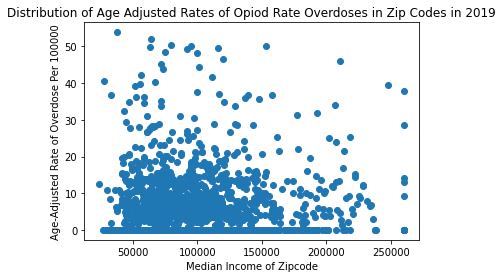

In [260]:
plt.scatter(df_joinednooutlier.medianincome, df_joinednooutlier.rate1)
plt.title("Distribution of Age Adjusted Rates of Opiod Rate Overdoses in Zip Codes in 2019")
plt.xlabel("Median Income of Zipcode")
plt.ylabel("Age-Adjusted Rate of Overdose Per 100000")

In [230]:
def inclessthan50000(row):
    if row['medianincome'] <= 50000:
        return True
    else:
        return False

In [231]:
df_joinedlessthan50k = df_joinednooutlier[df_joinednooutlier.apply(inclessthan50000, axis = 1)]

In [232]:
df_joinedlessthan50k

,year,county,rate,MEDINCOME,rate1,medianincome
zipcode,,,,,,
90002,2019,Los Angeles:,1.456244,45417,1.456244,45417.0
90003,2019,Los Angeles:,13.269925,44595,13.269925,44595.0
90005,2019,Los Angeles:,16.285088,49552,16.285088,49552.0
90006,2019,Los Angeles:,5.149211,37185,5.149211,37185.0
90007,2019,Los Angeles:,7.678160,41172,7.678160,41172.0
...,...,...,...,...,...,...
96093,2019,Trinity:,34.893786,46741,34.893786,46741.0
96113,2019,Lassen:,0.000000,49861,0.000000,49861.0
96132,2019,Lassen:,0.000000,28750,0.000000,28750.0


Text(0, 0.5, 'Number of zipcodes')

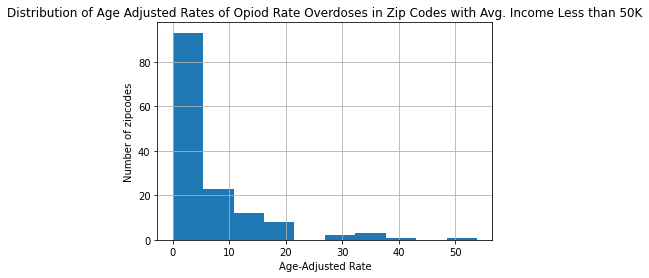

In [233]:
df_joinedlessthan50k['rate'].hist(bins=10)
plt.title("Distribution of Age Adjusted Rates of Opiod Rate Overdoses in Zip Codes with Med. Income Less than 50K")
plt.xlabel("Age-Adjusted Rate")
plt.ylabel("Number of zipcodes")

In [234]:
df_joinedlessthan50k.describe()

,year,rate,rate1,medianincome
count,143.0,143.000000,143.000000,143.000000
mean,2019.0,5.435537,5.435537,42145.307692
std,0.0,9.199961,9.199961,5912.982876
min,2019.0,0.000000,0.000000,23900.000000
25%,2019.0,0.000000,0.000000,38750.000000
50%,2019.0,0.000000,0.000000,43691.000000
75%,2019.0,7.590181,7.590181,46723.500000
max,2019.0,53.866551,53.866551,50000.000000


In [235]:
df_joinedlessthan100k.describe()

,year,rate,rate1,medianincome
count,719.0,719.000000,719.000000,719.000000
mean,2021.0,13.858600,13.858600,73736.454798
std,0.0,12.558539,12.558539,13920.443667
min,2021.0,0.000000,0.000000,50179.000000
25%,2021.0,0.000000,0.000000,62866.000000
50%,2021.0,12.425539,12.425539,73154.000000
75%,2021.0,21.254408,21.254408,84836.500000
max,2021.0,53.943732,53.943732,100000.000000


In [236]:
df_joined2.describe()

,year,rate,rate1,medianincome
count,1502.0,1502.000000,1502.000000,1502.000000
mean,2019.0,8.280792,8.280792,96772.191079
std,0.0,16.007816,16.007816,44508.937037
min,2019.0,0.000000,0.000000,23900.000000
25%,2019.0,0.000000,0.000000,64058.750000
50%,2019.0,4.406845,4.406845,86117.500000
75%,2019.0,10.166966,10.166966,119077.000000
max,2019.0,236.668796,236.668796,260000.000000


In [237]:
def inclessthan100000(row):
    if row['medianincome'] <= 100000 and row['medianincome'] > 50000:
        return True
    else:
        return False

In [238]:
df_joinedlessthan100k = df_joinednooutlier[df_joinednooutlier.apply(inclessthan100000, axis = 1)]

In [239]:
df_joinedlessthan100k

,year,county,rate,MEDINCOME,rate1,medianincome
zipcode,,,,,,
90001,2019,Los Angeles:,2.084256,50344,2.084256,50344.0
90004,2019,Los Angeles:,5.362783,58073,5.362783,58073.0
90008,2019,Los Angeles:,5.196753,72036,5.196753,72036.0
90010,2019,Los Angeles:,0.000000,68973,0.000000,68973.0
90016,2019,Los Angeles:,7.989556,57602,7.989556,57602.0
...,...,...,...,...,...,...
96128,2019,Lassen:,0.000000,81071,0.000000,81071.0
96130,2019,Lassen:,40.364796,66922,40.364796,66922.0
96137,2019,Plumas:,0.000000,63277,0.000000,63277.0


Text(0, 0.5, 'Number of zipcodes')

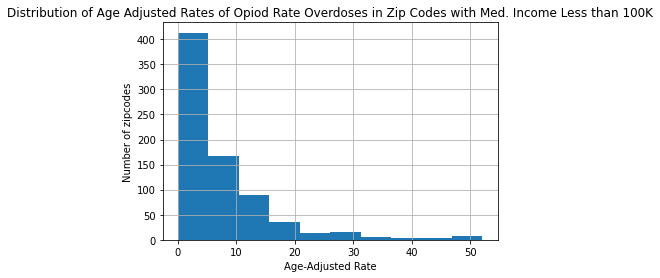

In [265]:
df_joinedlessthan100k['rate'].hist(bins=10)
plt.title("Distribution of Age Adjusted Rates of Opiod Rate Overdoses in Zip Codes with Med. Income Less than 100K")
plt.xlabel("Age-Adjusted Rate")
plt.ylabel("Number of zipcodes")

In [241]:
def inclessthan150000(row):
    if row['medianincome'] <= 150000 and row['medianincome'] > 100000:
        return True
    else:
        return False

In [242]:
def inclessthan200000(row):
    if row['medianincome'] <= 200000 and row['medianincome'] > 150000:
        return True
    else:
        return False

In [243]:
def inclessthan250000(row):
    if row['medianincome'] <= 250000 and row['medianincome'] > 200000:
        return True
    else:
        return False

In [244]:
def incgreaterthan250000(row):
    if row['medianincome'] >250000:
        return True
    else:
        return False

In [245]:
df_joinedlessthan150k = df_joinednooutlier[df_joinednooutlier.apply(inclessthan150000, axis = 1)]

In [246]:
df_joinedlessthan200k = df_joinednooutlier[df_joinednooutlier.apply(inclessthan200000, axis = 1)]

In [247]:
df_joinedlessthan250k = df_joinednooutlier[df_joinednooutlier.apply(inclessthan250000, axis = 1)]

In [248]:
df_joinedgreaterthan250k = df_joinednooutlier[df_joinednooutlier.apply(incgreaterthan250000, axis = 1)]

Text(0, 0.5, 'Number of zipcodes')

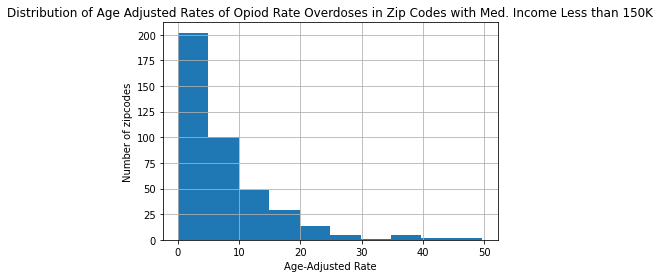

In [264]:
df_joinedlessthan150k['rate'].hist(bins=10)
plt.title("Distribution of Age Adjusted Rates of Opiod Rate Overdoses in Zip Codes with Med. Income Less than 150K")
plt.xlabel("Age-Adjusted Rate")
plt.ylabel("Number of zipcodes")

In [250]:
df_joinedlessthan150k.describe()

,year,rate,rate1,medianincome
count,408.0,408.000000,408.000000,408.000000
mean,2019.0,7.092886,7.092886,120810.764706
std,0.0,8.289057,8.289057,13351.729694
min,2019.0,0.000000,0.000000,100288.000000
25%,2019.0,0.000000,0.000000,109583.000000
50%,2019.0,5.046272,5.046272,118571.000000
75%,2019.0,10.219973,10.219973,131362.000000
max,2019.0,49.682387,49.682387,150000.000000


Text(0, 0.5, 'Number of zipcodes')

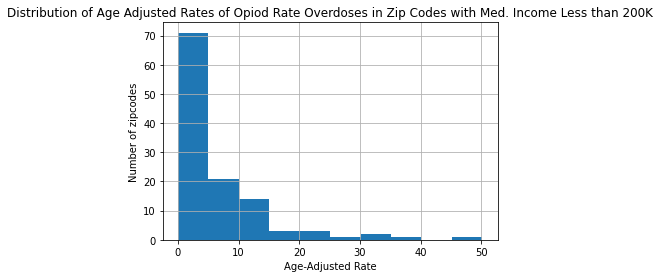

In [263]:
df_joinedlessthan200k['rate'].hist(bins=10)
plt.title("Distribution of Age Adjusted Rates of Opiod Rate Overdoses in Zip Codes with Med. Income Less than 200K")
plt.xlabel("Age-Adjusted Rate")
plt.ylabel("Number of zipcodes")

Text(0, 0.5, 'Number of zipcodes')

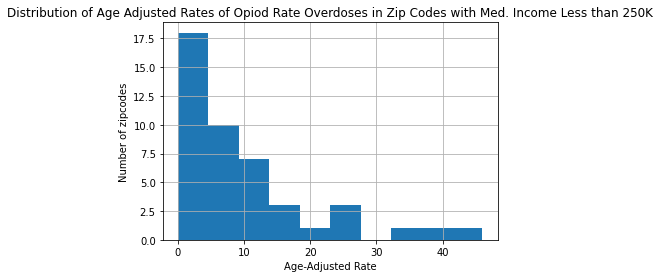

In [262]:
df_joinedlessthan250k['rate'].hist(bins=10)
plt.title("Distribution of Age Adjusted Rates of Opiod Rate Overdoses in Zip Codes with Med. Income Less than 250K")
plt.xlabel("Age-Adjusted Rate")
plt.ylabel("Number of zipcodes")

Text(0, 0.5, 'Number of zipcodes')

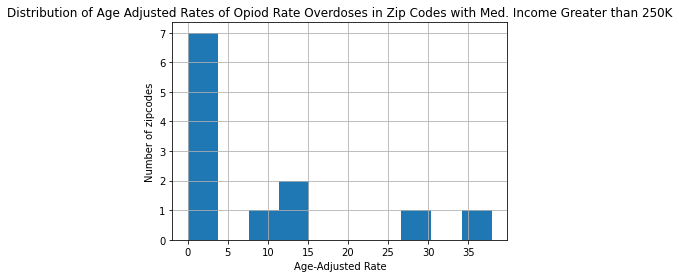

In [261]:
df_joinedgreaterthan250k['rate'].hist(bins=10)
plt.title("Distribution of Age Adjusted Rates of Opiod Rate Overdoses in Zip Codes with Med. Income Greater than 250K")
plt.xlabel("Age-Adjusted Rate")
plt.ylabel("Number of zipcodes")

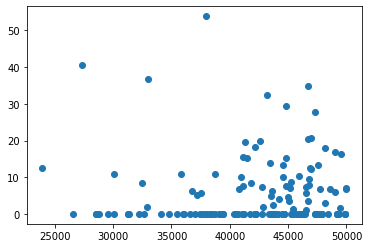

In [254]:
plt.scatter(df_joinedlessthan50k.medianincome, df_joinedlessthan50k.rate1)

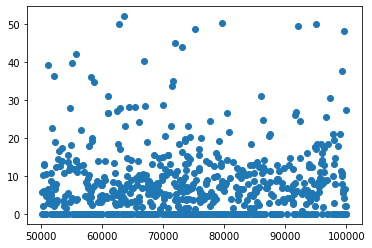

In [255]:
plt.scatter(df_joinedlessthan100k.medianincome, df_joinedlessthan100k.rate1)

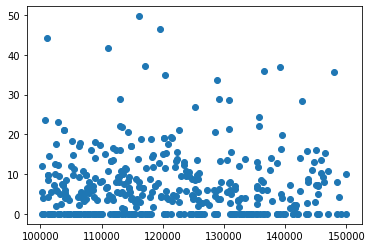

In [256]:
plt.scatter(df_joinedlessthan150k.medianincome, df_joinedlessthan150k.rate1)

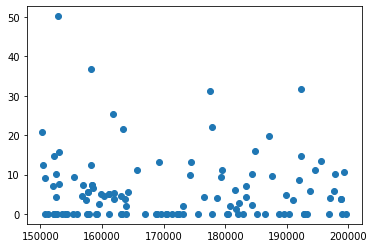

In [257]:
plt.scatter(df_joinedlessthan200k.medianincome, df_joinedlessthan200k.rate1)

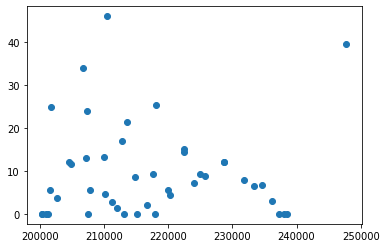

In [258]:
plt.scatter(df_joinedlessthan250k.medianincome, df_joinedlessthan250k.rate1)

In [266]:
df_joined

,year,county,rate,MEDINCOME,rate1
zipcode,,,,,
90001,2019,Los Angeles:,2.084256,50344,2.084256
90002,2019,Los Angeles:,1.456244,45417,1.456244
90003,2019,Los Angeles:,13.269925,44595,13.269925
90004,2019,Los Angeles:,5.362783,58073,5.362783
90005,2019,Los Angeles:,16.285088,49552,16.285088
...,...,...,...,...,...
96145,2019,Placer:,0.000000,110101,0.000000
96146,2019,Placer:,0.000000,148438,0.000000
96148,2019,Placer:,0.000000,105729,0.000000
